<h1 align="center"> Text Classification of News Headlines </h1>

## 1. Motivation
<hr>
Digitization has changed the way we process and analyze information. There is an exponential increase information from different sources, especially information comes in text form. The need to classify text has grown up dramatically in many industries as a result of text classification is a core problem to many applications. One use case for text classification is that E-commerce and news agencies tagging content or products using categories as a way to improve browsing or to identify related content on their website. The goal of this project is to provide Machine Learning approaches to classify the news into a pre-defined category. In particular, our interest is focused on performance of text categorization with word embedding and neural network models.

## 2. Approach
<hr>

In this project, we use headline, short description and authors of news data from HuffPost to classify them into different categories. Build and train 5 models along with different text data pro-processing and feature engineering methods. 

### 2.1 Exploratory Data Analysis
We start with exploratory data analysis to gain some insights of the dataset. We plot a histogram chart to check the distribution of the categories and observe if the categories are following a uniform distribution and balance. To observe the quality of the dataset, we calculate the percentage of missing values in the dataset. In addition to find the top contribute authors, we are interested to know if the top contributor write about the most popular categories most of the time.

### 2.2 Pre-processing data
In order to remove the noisy information and gain meaningful features from text data, performing text pre-process is nesscary. We perform lemitization, inflection and stopwords removal. 
* Lemmatization which refers to do things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. 
* In grammar, inflection is the modification of a word to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, and mood.
* Stop words are natural language words which have very little meaning, such as "and", "the", "a", "an", and similar words. By removing the stop words in English, the model is more accurate.

### 2.3 Model trainning
I. <strong>TF-IDF with LinearSVC</strong> <br>
We perform a word level tf-idf which uses Matrix representing tf-idf scores of every term in different documents. <br>Term frequency(TF) is simply the ratio of the count of a word present in a sentence, to the length of the sentence. Therefore, we can generalize term frequency as:
\begin{equation*}
TF = \frac{(Number of times term T appears in the particular row)} { (number of terms in that row)} 
\end{equation*}
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.
\begin{equation*}
IDF = \log{(N/n)}
\end{equation*}
where, N is the total number of rows and n is the number of rows in which the word was present.
Method:

Construct vocabulary (dictionary) 𝑉={𝑣1,…,𝑣𝑉} from a given set of training documents 𝐷=𝑑1,𝑑2,…,𝑑|𝐷|<br>

Convert every document 𝑑𝑖={𝑤𝑖1,…,𝑤𝑖|𝑑𝑖|} to a sequence of word indices 𝑘𝑖1,…,𝑘𝑖|𝑑𝑖|such that 𝑤𝑖𝑗=𝑣𝑘𝑖𝑗for all 𝑖,𝑗,𝑘.
<ul>
<li>Term frequency  
           𝑓𝑖𝑘 = Number of times term 𝑡𝑘 appeared in document 𝑑𝑖.           
    
       𝑓𝑖𝑘 = 0.5 + 0.5*𝑓𝑖𝑘 / max_𝑘 𝑓𝑖𝑘 
</li>
<li>Inverse document frequency (training)

       𝐼𝐷𝐹𝑖 = log(|𝐷| /  |{𝑡𝑗∈𝑑𝑖,𝑑𝑖∈𝐷}|) 
</li>
<li>TFIDF

       𝑇𝐹𝐼𝐷𝐹𝑖𝑘 = 𝑓𝑖𝑘 × 𝐼𝐷𝐹𝑖 
</li>
</ul>
<br>
Dimension reduction is one of important process in text
classification and enhances the performance of classification techniques via reducing dimensions so that text classification algorithms process text documents with a reduced number of features. Singular value decomposition (SVD) is a way used to reduce the dimension of a vector that is used in linear transformation approach.

II. <strong>Doc2Vec with LinearSVC</strong> <br>
Doc2Vec a one kind of word embedding which is a form of representing words and documents using a dense vector representation. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used.<br>
Doc2Vec combines two techniques; CBOW(Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations. 
![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/04224109/Screenshot-from-2017-06-04-22-40-29.png "CBOW model")

![image](image/doc2vec1.png)

Above is a diagrammatic representation of the CBOW model, note that the weight between the hidden layer and the output layer is taken as the word vector representation of the word.
![alt text](https://cdn-images-1.medium.com/max/1600/1*keqyBCQ5FL6A7DZLrXamvQ.png "CBOW model")

A straight-forward example to understand Doc2Vec is as plot shown above, we can see king to queen is like man to woman. <br>
Once we create features using word embedding, we can train the LinearSVC model simlar to model 1.

III. <strong>Long Short Term Memory model</strong> <br>
Transforming text documents to sequence of tokens and pad them and create a mapping of token and their respective embeddings in order to train Model 3, 4, and 5. <br>
Unlike Feed-forward neural networks in which activation outputs are propagated only in one direction, the activation outputs from neurons propagate in both directions (from inputs to outputs and from outputs to inputs) in Recurrent Neural Networks. This creates loops in the neural network architecture which acts as a ‘memory state’ of the neurons. This state allows the neurons an ability to remember what have been learned so far.<BR>
The memory state in RNNs gives an advantage over traditional neural networks but a problem called Vanishing Gradient is associated with them. In this problem, while learning with a large number of layers, it becomes really hard for the network to learn and tune the parameters of the earlier layers. To address this problem, A new type of RNNs called LSTMs (Long Short Term Memory) Models have been developed.[1]
![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/bptt-768x313.png "CBOW model")

IV. <strong>LSTM + CNN model</strong> <br>
This model is built on top of model 3 from above by adding an extra 1D convolutional layer to reduce the training time.<br>
We add a convolutional layer improve the LSTM because Model 3 take long time to train for few epochs. As we know, Convolutional Neural Network come from image processing with a kernel filter over the data and calculate a high-level representation.

V. <strong>LSTM + CNN + Glove Embedding</strong> <br>
Similar to Model 4, in model 5 we use a pre-trained glove 100 dimension word embedding as initial input to train the LSTM and CNN model.

VI. <strong>LinearSVC + CountVectorizer + Nouns and Pronouns</strong> <br>
In this approach, we extracted nouns and pronouns from the headlines and used that information to classify the news categories. The reason we decided to experiment with this approach was because, after analyzing some of the news headlines and articles, we found that the names mentioned were usually common and specific to each category. For example, a headline mentioning Barack Obama is likely to be related to politics. So, by extracting just that information, we wanted to limit the dimensionality of the features being fed to the model and see if it has any impact on the results.

## 3. Data
<hr>
The dataset contains around 125k news headlines from the year 2013 to 2018 obtained from HuffPost. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.<br>

The columns included in this dataset are:<br>
<b>authors</b>: authors who published the article<br>
<b>category</b>: the category of the news article<br>
<b>date</b>: date article was published<br>
<b>headline</b>: the headline of the news article<br>
<b>article_link</b>: link to the original news article. Useful for collecting supplementary data<br>
<b>short_description</b>: a short description of the news article<br>

Source: https://www.kaggle.com/rmisra/news-category-dataset/home

## 4. Code

In [7]:
import re
import pickle  
import nltk
import matplotlib
import json
import random
import sklearn
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import inflect
import unicodedata
import multiprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn import utils
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import StratifiedKFold
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
##from gensim.test.test_doc2vec import ConcatenatedDoc2Vec

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

# Others
import nltk
import string
from nltk.corpus import stopwords
from tqdm import tqdm
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
dataset_news_category = pd.read_json("Data/News_Category_Dataset.json", lines=True)
dataset_news_category.head(5)

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


# Exploratory Data Analysis

### Checking the distribution of the categories

<b>Observation</b>: Clearly the data is sekwed with POLITICS and ENTERTAINMENT having the highest counts. Will need to balance the dataset so the classifer doesn't get sekwed as well

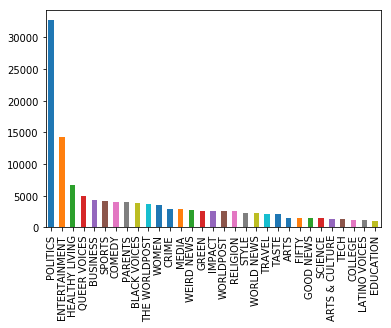

In [3]:
dataset_news_category.category.value_counts().plot.bar()

### Calculating to see if there are any missing values

<b>Observation</b>: There are some missing values, most notable ones are AUTHORS and SHORT_DESCRIPTION 

In [4]:
#extracting only the author name
dataset_news_category['processed_authors']=dataset_news_category['authors'].str.split(',')

processed_authors = [item[0] for item in dataset_news_category['processed_authors']]
dataset_news_category['authors'] = processed_authors
    
del dataset_news_category['processed_authors']
    
# Convert all empty spaces in the dataset to NaN
dataset_news_category = dataset_news_category.replace(r'\s+( +\.)|#',np.nan,regex=True).replace('',np.nan)

#Calculate % of missing values
print(pd.DataFrame(dataset_news_category.isnull().sum()/dataset_news_category.shape[0]*100,columns=['% Missing Values']))

                   % Missing Values
authors                   11.322596
category                   0.000000
date                       0.000000
headline                   0.529647
link                       0.122411
short_description         16.046212


### Counts of the number of articles by each author
<b>Observation</b>: There doesnt seem to be alot of skewedness with respect to the authors, but we can say Lee Moran, Ron Dicker and Ed Mazza were the top 3 contributors

In [5]:
print("Total number of Articles:",dataset_news_category.shape[0])
print("Total number of Authors:",len(dataset_news_category['authors'].unique()))
print(pd.DataFrame([dataset_news_category['authors'].value_counts()[0:15],dataset_news_category['authors'].value_counts()[0:15]/dataset_news_category.shape[0]*100], index=["No. of Articles written","% of Articles written"]).T)

Total number of Articles: 124989
Total number of Authors: 17876
                   No. of Articles written  % of Articles written
Lee Moran                           2424.0               1.939371
Ron Dicker                          1802.0               1.441727
Ed Mazza                            1321.0               1.056893
Cole Delbyck                        1141.0               0.912880
Andy McDonald                       1065.0               0.852075
Julia Brucculieri                   1059.0               0.847275
Carly Ledbetter                     1024.0               0.819272
Curtis M. Wong                      1005.0               0.804071
Mary Papenfuss                       974.0               0.779269
Bill Bradley                         965.0               0.772068
Sam Levine                           895.0               0.716063
David Moye                           875.0               0.700062
Igor Bobic                           870.0               0.696061
Nina Golgows

### Do the top contributors write about the most popular categories?

</b>Observation</b>: All the top contributors write mostly about comedy and entertainment. This signifies 2 things:
1. POLITICS and ENTERTAINMENT seem to be a popular category among many authors.
2. The intial hypothsis of top contributors writting mostly about POLITICS and ENTERTAINMENT was wrong.

Text(0.5,1,'Ed Mazza')

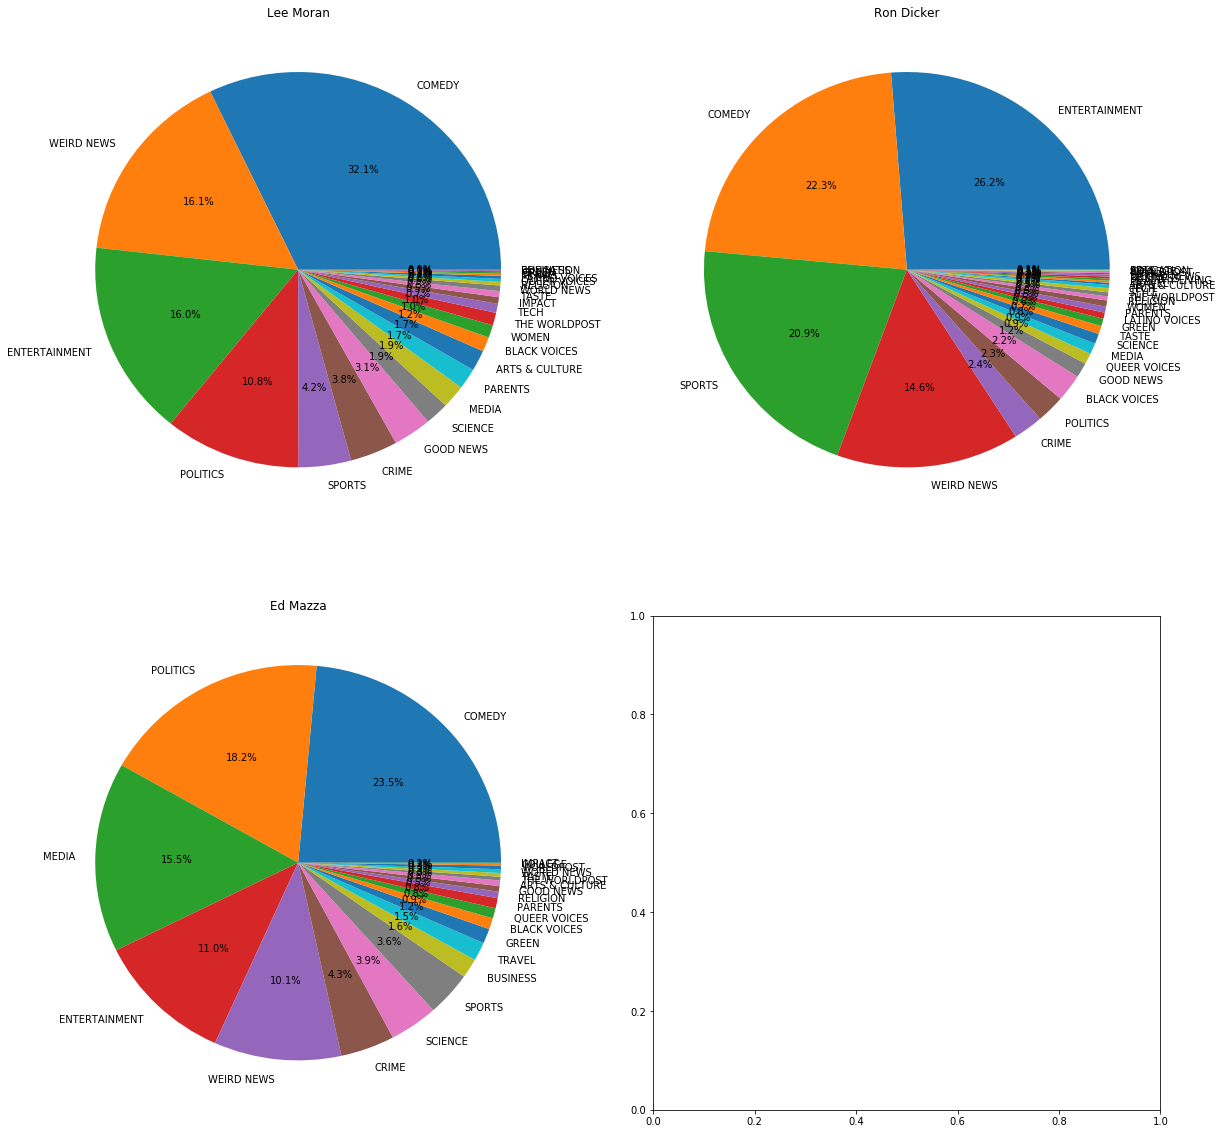

In [6]:
articles_of_top_3 = dataset_news_category[dataset_news_category["authors"].isin(['Lee Moran', 'Ron Dicker', 'Ed Mazza'])]
lee = pd.DataFrame(articles_of_top_3[articles_of_top_3.authors=='Lee Moran']['category'].value_counts())
ron = pd.DataFrame(articles_of_top_3[articles_of_top_3.authors=='Ron Dicker']['category'].value_counts())
ed = pd.DataFrame(articles_of_top_3[articles_of_top_3.authors=='Ed Mazza']['category'].value_counts())

fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0, 0].pie(lee,labels=lee.index,autopct = '%1.1f%%')
ax[0, 0].set_title("Lee Moran")
ax[0, 1].pie(ron,labels=ron.index ,autopct = '%1.1f%%')
ax[0, 1].set_title("Ron Dicker")
ax[1, 0].pie(ed,labels=ed.index, autopct = '%1.1f%%')
ax[1, 0].set_title("Ed Mazza")

### Wordcloud showing most popular people being talked about

                                   ENTS   LABEL
0                (The, Secret, Service)     ORG
1                    (Dax, Shepard, 's)  PERSON
2                            (Beholder)  PERSON
3                     (Bernie, Sanders)  PERSON
4                             (Popular)    NORP
5                             (America)     GPE
6  (Carolina, Panthers, Make, Adorable)  PERSON
7                              (A, Day)    DATE
8                            (Congress)     ORG
9                       (James, Corden)  PERSON


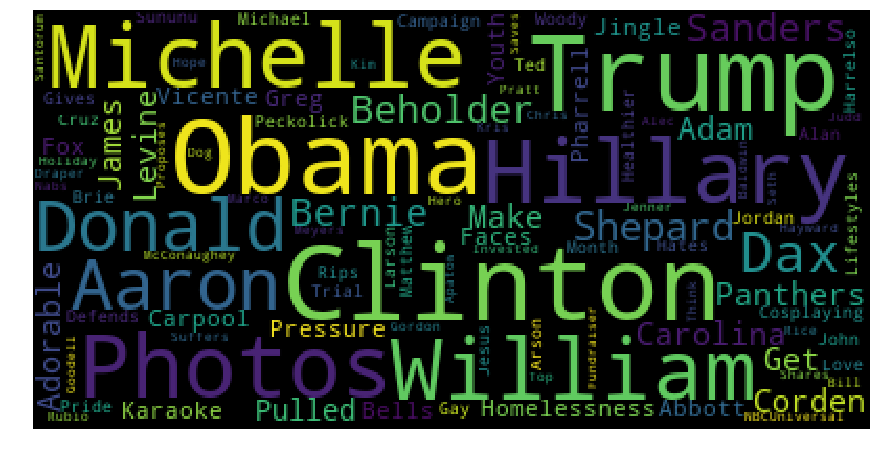

In [8]:
headline_entities=[]
for title in dataset_news_category.headline[random.sample(list(dataset_news_category.index),10000)]:
    for ents in nlp(str(title)).ents:
        headline_entities.append([ents,ents.label_])
    
headline_entities = pd.DataFrame(headline_entities)
headline_entities.columns =["ENTS","LABEL"]
print(headline_entities.head(10))
headline_entities=headline_entities[headline_entities["LABEL"]=="PERSON"]

plt.figure(figsize=(15,10))
wordcloud = WordCloud(background_color="black",
                      stopwords = stopwords.words('english'),
                      max_words=100,
                      max_font_size=50,
                      random_state=1143
                     ).generate(str(headline_entities["ENTS"]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Classification

In [9]:
dataset_news_category = pd.read_json("Data/News_Category_Dataset.json", lines=True)

### Pre-processing

<b>Lemmatization</b>: Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

<b>Inflection</b>: In grammar, inflection is the modification of a word to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, and mood.[1]

<b> Stopwords removal</b>: Stop words are natural language words which have very little meaning, such as "and", "the", "a", "an", and similar words.

In [10]:
preprocessed_dataset = dataset_news_category.copy()
del preprocessed_dataset['link']
preprocessed_dataset = preprocessed_dataset.dropna()
y = np.array(preprocessed_dataset.category)
del preprocessed_dataset['category']
del preprocessed_dataset['authors']
del preprocessed_dataset['date']
X = np.array(preprocessed_dataset)

documents = []
stemmer = WordNetLemmatizer()
p = inflect.engine()

for sen in range(0, len(X)):  
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    
    #stropword removal
    document = [word for word in document if word not in stopwords.words('english')]
    
    #infecltion
    document = [p.number_to_words(word) if word.isdigit() else word for word in document]
    
    #removal of special ascii characters
    document = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in document]
    
    document = ' '.join(document)

    documents.append(document)
    

# removing the highest and lowest frequency words
X_temp=documents
#Top 10 highest frequencies
freq_high = pd.Series(' '.join(X_temp).split()).value_counts()[:10]
freq_high = list(freq_high.index)
#With frequency 1
freq_low = pd.DataFrame(' '.join(X_temp).split(),columns=["word"])
freq_low=freq_low.groupby(["word"]).size().reset_index(name='counts')
freq_low=freq_low[freq_low.counts==1]['word'].values

documents=[]
for document in X_temp:
    document=document.split()
    document = [word for word in document if word not in freq_high]
    document = [word for word in document if word not in freq_low]
    document = ' '.join(document)
    documents.append(document)

CPU times: user 53min 14s, sys: 1min 9s, total: 54min 24s
Wall time: 53min 16s


1. The following cell is only used for Model 3, Model 4 and Model 5.
2. Tokenizes the data into sequences and pads them all to a same length (50 in our case).
3. Creates one-hot encoding of the labels

In [11]:
### Create sequence 
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(documents)
sequences = tokenizer.texts_to_sequences(documents)
data = pad_sequences(sequences, maxlen=50)

## creating one hot encoding for the labels
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

CPU times: user 8.55 s, sys: 76 ms, total: 8.62 s
Wall time: 8.58 s


## Model 1 - TF-IDF with LinearSVC

In [12]:
%%time
# type-1 Transformation
vectorize = sklearn.feature_extraction.text.TfidfVectorizer(analyzer = "word", max_features=30000)
X = vectorize.fit_transform(documents)

# type-2 Transforamtion
#vectorizer = CountVectorizer(max_features=3000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
#X = vectorizer.fit_transform(documents).toarray()
#tfidfconverter = TfidfTransformer()  
#X = tfidfconverter.fit_transform(X).toarray()

#svd_model=TruncatedSVD(n_components=2000,algorithm='randomized', n_iter=10, random_state=42)
#X=svd_model.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_new = X_train
y_new = y_train
classifer = LinearSVC(max_iter=100)

skf = StratifiedKFold(n_splits=5, random_state=24)
itter = 1

for train_index, test_index in skf.split(X_new,y_new): 
    print("\nIteration:", itter)
    print("Train:", len(train_index), "Validation:", len(test_index)) 
    X_train, X_test = X_new[train_index], X_new[test_index] 
    y_train, y_test = y_new[train_index], y_new[test_index]
    
    classifer.fit(X_train, y_train)
    y_pred = classifer.predict(X_test)
    
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    itter = itter + 1
    

y_pred = classifer.predict(X_test)
print("\nTesting on detatched test set\n")
print(classification_report(y_test,y_pred))  
print("Accuracy:",accuracy_score(y_test, y_pred))


Iteration: 1
Train: 79981 Validation: 20010
Testing accuracy 0.6012493753123438
Testing F1 score: 0.5893520747482109

Iteration: 2
Train: 79988 Validation: 20003
Testing accuracy 0.607708843673449
Testing F1 score: 0.5945376797777006

Iteration: 3
Train: 79993 Validation: 19998
Testing accuracy 0.6040604060406041
Testing F1 score: 0.5921944091109154

Iteration: 4
Train: 79999 Validation: 19992
Testing accuracy 0.6039915966386554
Testing F1 score: 0.592205474816203

Iteration: 5
Train: 80003 Validation: 19988
Testing accuracy 0.6019611767060236
Testing F1 score: 0.5889375796343678

Testing on detatched test set

                precision    recall  f1-score   support

          ARTS       0.45      0.39      0.42       242
ARTS & CULTURE       0.38      0.22      0.28       208
  BLACK VOICES       0.51      0.39      0.44       615
      BUSINESS       0.51      0.47      0.49       680
       COLLEGE       0.51      0.41      0.45       183
        COMEDY       0.52      0.41      0.

## Model 2 - Doc2Vec with LinearSVC

In [33]:
%%time

x_old = pd.DataFrame(preprocessed_dataset)
x_old.columns = ['headline','short_decs']
y_old = pd.DataFrame(y)
y_old.columns=['categories']
df = pd.concat([x_old,y_old], axis=1)

df["combined_col"] = df["headline"].map(str) + " " + df["short_decs"]

train, test = train_test_split(df, test_size=0.3, random_state=42)

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['combined_col']), tags=[r.categories]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['combined_col']), tags=[r.categories]), axis=1)

cores = multiprocessing.cpu_count()

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha
    
    
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha
    
    
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

#X_new = np.concatenate([X_train, X_test])
#y_new = np.concatenate([y_train, y_test])

X_new = np.array(X_train)
y_new = np.array(y_train)

classifer = LinearSVC(max_iter=100)

skf = StratifiedKFold(n_splits=5, random_state=24)

itter = 1
for train_index, test_index in skf.split(X_new,y_new):
    print("\nIteration:", itter)
    print("Train:", len(train_index), "Validation:", len(test_index)) 
    X_train, X_test = X_new[train_index], X_new[test_index] 
    y_train, y_test = y_new[train_index], y_new[test_index]
    
    classifer.fit(X_train, y_train)
    y_pred = classifer.predict(X_test)
    
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    itter = itter + 1
    

y_pred = classifer.predict(np.array(X_test))
print("Testing on detatched test set\n")
print(classification_report(y_test,y_pred))  
print("Accuracy:",accuracy_score(np.array(y_test), y_pred))

100%|██████████| 87492/87492 [00:00<00:00, 1206584.00it/s]



Iteration: 1
Train: 69981 Validation: 17511
Testing accuracy 0.6739192507566673
Testing F1 score: 0.6663093465055796

Iteration: 2
Train: 69988 Validation: 17504
Testing accuracy 0.6876142595978062
Testing F1 score: 0.6797692820880162

Iteration: 3
Train: 69995 Validation: 17497
Testing accuracy 0.6826884608790078
Testing F1 score: 0.6740918056576204

Iteration: 4
Train: 69999 Validation: 17493
Testing accuracy 0.6817012519293432
Testing F1 score: 0.6734479646516556

Iteration: 5
Train: 70005 Validation: 17487
Testing accuracy 0.6839366386458512
Testing F1 score: 0.6753375114270989
Testing on detatched test set

                precision    recall  f1-score   support

          ARTS       0.77      0.61      0.68       209
ARTS & CULTURE       0.70      0.58      0.64       186
  BLACK VOICES       0.72      0.53      0.61       534
      BUSINESS       0.67      0.57      0.62       592
       COLLEGE       0.83      0.72      0.77       160
        COMEDY       0.62      0.35      0

## Model 3 - LSTM

In [34]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data, dummy_y, test_size=0.2, random_state=0)

#USING LSTM
model = Sequential()
model.add(Embedding(20000, 100, input_length=50))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(31, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
## Fit the model
model.fit(X_train, y_train, validation_split=0.4, epochs=5)

y_pred = model.predict(X_test)

predictions = list(np.argmax(y_test, axis=1))
actual = list(np.argmax(y_pred, axis=1))

print(classification_report(actual,predictions))  
print("Accuracy:",accuracy_score(actual,predictions))

Train on 59994 samples, validate on 39997 samples
Epoch 1/5
59994/59994 [==============================] - 290s 5ms/step - loss: 2.4070 - categorical_accuracy: 0.3675 - val_loss: 1.8302 - val_categorical_accuracy: 0.5061
Epoch 2/5
59994/59994 [==============================] - 300s 5ms/step - loss: 1.5163 - categorical_accuracy: 0.5774 - val_loss: 1.5012 - val_categorical_accuracy: 0.5849
Epoch 3/5
59994/59994 [==============================] - 315s 5ms/step - loss: 1.1245 - categorical_accuracy: 0.6752 - val_loss: 1.4851 - val_categorical_accuracy: 0.5931
Epoch 4/5
59994/59994 [==============================] - 306s 5ms/step - loss: 0.8778 - categorical_accuracy: 0.7428 - val_loss: 1.5650 - val_categorical_accuracy: 0.5950
Epoch 5/5
59994/59994 [==============================] - 284s 5ms/step - loss: 0.6828 - categorical_accuracy: 0.7944 - val_loss: 1.7258 - val_categorical_accuracy: 0.5839
             precision    recall  f1-score   support

          0       0.35      0.43      0.3

## Model 4 - LSTM + CNN

In [35]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data, dummy_y, test_size=0.2, random_state=0)

#using LSTM + CNN
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(vocabulary_size, 100, input_length=50))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(64, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(31, activation='sigmoid'))
    model_conv.compile(loss='categorical_crossentropy', optimizer='adam',    metrics=['categorical_accuracy'])
    return model_conv
model_conv = create_conv_model()
model_conv.fit(X_train, y_train, validation_split=0.4, epochs = 5)

y_pred = model.predict(X_test)

predictions = list(np.argmax(y_test, axis=1))
actual = list(np.argmax(y_pred, axis=1))

print(classification_report(actual,predictions))  
print("Accuracy:",accuracy_score(actual,predictions))

Train on 59994 samples, validate on 39997 samples
Epoch 1/5
59994/59994 [==============================] - 164s 3ms/step - loss: 2.5404 - categorical_accuracy: 0.3332 - val_loss: 2.1056 - val_categorical_accuracy: 0.4304
Epoch 2/5
59994/59994 [==============================] - 156s 3ms/step - loss: 1.8369 - categorical_accuracy: 0.4930 - val_loss: 1.8036 - val_categorical_accuracy: 0.5073
Epoch 3/5
59994/59994 [==============================] - 165s 3ms/step - loss: 1.4585 - categorical_accuracy: 0.5915 - val_loss: 1.7328 - val_categorical_accuracy: 0.5345
Epoch 4/5
59994/59994 [==============================] - 163s 3ms/step - loss: 1.1969 - categorical_accuracy: 0.6603 - val_loss: 1.7387 - val_categorical_accuracy: 0.5413
Epoch 5/5
59994/59994 [==============================] - 162s 3ms/step - loss: 0.9751 - categorical_accuracy: 0.7234 - val_loss: 1.8147 - val_categorical_accuracy: 0.5370
             precision    recall  f1-score   support

          0       0.35      0.43      0.3

## Model 5 - LSTM + CNN + Glove Embeddings

In [36]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data, dummy_y, test_size=0.2, random_state=0)

#Glove embedding + LSTM + CNN
embeddings_index = dict()
f = open('Data/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
            

## create model
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 100, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(31, activation='sigmoid'))
model_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
## Fit train data
model_glove.fit(X_train, y_train, validation_split=0.4, epochs = 5)

y_pred = model.predict(X_test)

predictions = list(np.argmax(y_test, axis=1))
actual = list(np.argmax(y_pred, axis=1))

print(classification_report(actual,predictions))  
print("Accuracy:",accuracy_score(actual,predictions))

Train on 59994 samples, validate on 39997 samples
Epoch 1/5
59994/59994 [==============================] - 91s 2ms/step - loss: 2.0531 - categorical_accuracy: 0.4334 - val_loss: 1.7158 - val_categorical_accuracy: 0.5122
Epoch 2/5
59994/59994 [==============================] - 87s 1ms/step - loss: 1.6649 - categorical_accuracy: 0.5273 - val_loss: 1.6151 - val_categorical_accuracy: 0.5412
Epoch 3/5
59994/59994 [==============================] - 84s 1ms/step - loss: 1.5538 - categorical_accuracy: 0.5542 - val_loss: 1.5625 - val_categorical_accuracy: 0.5517
Epoch 4/5
59994/59994 [==============================] - 80s 1ms/step - loss: 1.4880 - categorical_accuracy: 0.5702 - val_loss: 1.5096 - val_categorical_accuracy: 0.5682
Epoch 5/5
59994/59994 [==============================] - 82s 1ms/step - loss: 1.4396 - categorical_accuracy: 0.5811 - val_loss: 1.5015 - val_categorical_accuracy: 0.5698
             precision    recall  f1-score   support

          0       0.35      0.43      0.39    

### Model 6 - Linear SVM + CountVectorizer + Nouns and Pronouns


In [9]:
 import pandas as pd
import spacy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


def filter_token(token):
    return token.pos_ in {'PROPN', 'NOUN'}

# loading the dataset
news_df = pd.read_json("Data/News_Category_Dataset.json", lines=True)
nlp = spacy.load('en')

# divide data into training and test
test_proportion = 0.2
X_train, X_test = train_test_split(news_df, test_size=test_proportion)

# using nouns and pronouns from headlines
X_train["headline_tokenized"] = X_train["headline"].apply(lambda text: nlp(text))
X_test["headline_tokenized"] = X_test["headline"].apply(lambda text: nlp(text))

X_train["filtered_tokens"] = X_train["headline_tokenized"].apply(lambda x: list(filter(filter_token, x)))
X_test["filtered_tokens"] = X_test["headline_tokenized"].apply(lambda x: list(filter(filter_token, x)))

# changing the tokens into space separated tokens to be give to the CountVectorizer/TFIDF Vectorizer
X_train["filtered_tokens_cv"] = X_train["filtered_tokens"].apply(lambda x: ' '.join(str(v) for v in x))
X_test["filtered_tokens_cv"] = X_test["filtered_tokens"].apply(lambda x: ' '.join(str(v) for v in x))

vectorizer = TfidfVectorizer(lowercase=True)

train = vectorizer.fit_transform(X_train["filtered_tokens_cv"]).toarray()
test = vectorizer.transform(X_test["filtered_tokens_cv"]).toarray()

Y_train = np.array(X_train["category"])
Y_test = np.array(X_test["category"])

model = LinearSVC()
model.fit(train,Y_train)

Y_predict = model.predict(test)
accuracy = accuracy_score(Y_test,Y_predict)

precision, recall, f_score, _ = precision_recall_fscore_support(Y_test, Y_predict, average="weighted")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F-score: ", f_score)

/Users/ting/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ting/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ting/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Accuracy:  0.5909672773821906
Precision:  0.572914684901707
Recall:  0.5909672773821906
F-score:  0.5771727457869134


## 5. Experimental Setup

The following methods have been used to convert text-data into vectors:
<ul>
<li>TF-IDF</li>
<li>Doc2Vec</li>
<li>Pre-Trained Glove Embeddings</li>
<li>Neural Network Embedding Layer</li>
</ul>

The following models have been used to classify the data:
<ul>
<li>LinearSVC</li>
<li>Long Short Term Memory model</li> 
<li>LSTM + CNN model</li>
</ul>

Setup of the combined problem:
<ul>
<li>The first model uses TF-IDF with LinearSVC.</li>
<li>The second model uses Doc2Vec with LinearSVC.</li>
<li>The third model uses Neural Network Embedding Layer with Long Short Term Memory model.</li>
<li>The fourth model uses Neural Network Embedding Layer with LSTM + CNN model.</li>
<li>The fifth model uses Pre-Trained Glove Embeddings with LSTM + CNN model.</li>
</ul>

In this setup, we are trying to find the best classification of the News Topics by comparing different kinds of NLP text to vector transformations and different Machine Learning classification models.

For evaluation, we first reserve a test set and validate the training using startified cross validation technique.
Stratification seeks to ensure that each fold is representative of all strata of the data. Generally this is done in a supervised way for classification and aims to ensure each class is (approximately) equally represented across each test fold.

Once the training and validation is done, we use the reserved test set to get the predictions of our trained models.

The metrics used for evaluation of performance in our problem are:

1. <b>Precision</b> - Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives.
2. <b>Recall</b> - The definition of recall is the number of true positives divided by the number of true positives plus the number of false negatives. 
3. <b>F-Score</b> - The F1 score is the harmonic mean of precision and recall.
4. <b>Accuracy</b> - The number of labels correctly predicted divided by all the labels predicted.

## 6. Results
The results of the classification were as follows:
<table width='700px'>
    <thead>
        <tr>
            <th>Model Name</th>
          	<th>Precision</th>
          	<th>Recall</th>
          	<th>F1-Score</th>
            <th>Test-Set Accuracy</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>TF-IDF + LinearSVC</td>
            <td>0.59</td>
            <td>0.60</td>
            <td>0.59</td>
            <td>0.60</td>
        </tr>
        <tr>
            <td>Doc2Vec + LinearSVC</td>
            <td>0.69</td>
            <td>0.68</td>
            <td>0.68</td>
            <td>0.68</td>
        </tr>
        <tr>
            <td>LSTM + Neural Embeddings</td>
            <td>0.59</td>
            <td>0.58</td>
            <td>0.58</td>
            <td>0.58</td>
        </tr>
        <tr>
            <td>LSTM-CNN + Neural Embeddings</td>
            <td>0.59</td>
            <td>0.58</td>
            <td>0.58</td>
            <td>0.58</td>
        </tr>
        <tr>
            <td>LSTM-CNN + Pre-Trained Embeddings</td>
            <td>0.59</td>
            <td>0.58</td>
            <td>0.58</td>
            <td>0.58</td>
        </tr>
    </tbody>
</table>

## 7. Analysis of the Results

The baseline for this project is the first model that we implement, which uses bag of words TF-IDF to build the features and apply a Linear Support Vector Classification. And we look at f1-score to determine the best fitting model. <br>

We are able score higher with Doc2Vec and Linear Support Vector model.  F1-score increased by 9% and accuracy on test dataset is 8% higher. As we know that Doc2Vec creates a vector representation of the sentences or documents, so news in belone to a category might have very similar headlines or short description. In contrast, two distinct new categories will very different vector representing their descriptions. As a result of that, using Doc2Vec can build a better training matrice.<br>

We also tried to build model use neural network to improve the performance. However, very surprisingly, we were not able to pass the baseline with neural net models like LSTM and CNN. RNNs suffer from the vanishing gradient problem which makes it difficult to learn and tune the parameters in the earlier layers. Moreover, to train a good fit LSTM or CNN model requires a large amount of data, however, the dataset we train on is 125k rows and it is relatively small. We are not able to get a better score due to these limitation for the neural net models.

## 8. Future Work
f given more time and resources, we would have wanted to try the following experiments:<ul>
<li>Use doc2vec as embeddings for CNN.</li>
<li>Parameter tuning using Grid Search on neural networks. Since Grid Search require an extensive use of computational power, it wasn't feasible for us to find optimal parameters for our CNN model.</li>
<li>Analyze the overall tone and wrtiing style of different categories of articles. It would be interesting to see if the genre of the article dictates the way it is is written and be able to extract features based on that.</li>
</ul>


## Referrence 
[1] https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/